# Analysis of Road Traffic Fatal Accidents in the United States in 2007 and 2015
## Conor Hall - T00178904

###### 1. Configuring the file paths: 
The file paths were saved as variables and used through out each cell so that, if a file path was to change, it would only need to be updated in one location in the notebook.

<font color=Green>Note:</font> Run this to set the paths.

In [2]:
#Setting the dataset file paths
FARS2015_FP = 'DataSets/FARS-2015-PostDataPrep.csv'
POP2015_FP = 'DataSets/POP-2010-2017.csv'
FARS2007_FP = 'DataSets/FARS-2007-PostDataPrep.csv'
POP2007_FP = 'DataSets/POP-2000-2010.csv'

#### 2. Preparing the 2007 FARS data
The 2007 Fatality Analysis Reporting System (FARS) data was prepared as follows;
- Only selecting the attributes that were required for the analysis
- Calculating the fatality rate
- Calculating the EMS arrival time (Excluding Unknown and Unrecorded hours and minutes)

<font color=red>KDD step(s):</font> Selection & Preprocessing

In [3]:
import pandas as pd
#Full/Complete/All the attributes from the 2007 FARS dataset
Full_FARS_2007 = pd.read_csv('DataSets/FARS-2007.csv')

#Only the data atributes that were required for this analysis
Used_FARS_2007 = Full_FARS_2007[['ST_CASE','FATALS','PERSONS','MONTH','MAN_COLL','SP_LIMIT','LGT_COND','WEATHER','SUR_COND','STATE','DRUNK_DR']]

#Calculate Fatality Rate and concatonate with the used / required attributes
fatalrateDF = Full_FARS_2007[['ST_CASE','FATALS','PERSONS']]
fatalrateNumericlst = []
fatalratelst = []
for index, row in fatalrateDF.iterrows():
    fatalrate = row['FATALS']/row['PERSONS']
    fatalrateNumericlst.append(fatalrate)
    if fatalrate > 0.5:
        fatalratelst.append("high")
    elif fatalrate <= 0.5:
        fatalratelst.append("low")
fatalrate2007 = pd.DataFrame()
fatalrate2007['rate'], fatalrate2007['rate_numerical'] = [fatalratelst, fatalrateNumericlst]
FARS_2007_DataPrep = pd.concat([Used_FARS_2007,fatalrate2007],axis=1)

#Calculate EMS Arrival Time - 2007
arrivaltimeDF = Full_FARS_2007[['ARR_HOUR','HOUR','ARR_MIN','MINUTE']]
# HOUR and MINUTE = the hour and minute of the accident occuring
# ARR_HOUR and ARR_MIN = the hour and minute of the EMS arrived at the accident
arrivaltimeDF = arrivaltimeDF[~arrivaltimeDF.ARR_HOUR.isin([99,88])]
arrivaltimeDF = arrivaltimeDF[~arrivaltimeDF.ARR_MIN.isin([99,88,97,98])]
arrivaltimeDF = arrivaltimeDF[~arrivaltimeDF.HOUR.isin([99,88])]
arrivaltimeDF = arrivaltimeDF[~arrivaltimeDF.MINUTE.isin([88,98,99])]

arrivaltimelst = []
for index, row in arrivaltimeDF.iterrows():
    if row['ARR_HOUR'] == 0 or row['HOUR'] == 0:
        row['ARR_HOUR'] = 24 
        row['HOUR'] = 24
    arrivaltime = 60 * (row['ARR_HOUR'] - row['HOUR']) + (row['ARR_MIN'] - row['MINUTE'])
    arrivaltimelst.append(abs(arrivaltime))
arrivaltime2007 = pd.DataFrame(arrivaltimelst, columns=['arrival_time'])
FARS_2007_DataPrep = pd.concat([FARS_2007_DataPrep,arrivaltime2007],axis=1)

#Create new .csv file with the prepared data
FARS_2007_DataPrep.to_csv(FARS2007_FP)

#### 3. Preparing the 2015 FARS data
The 2015 FARS data was prepared by completing the following;
- Getting the road and speed limit from another file. This was in a separate .csv file when the 2015 FARS data set was downloaded.
- Only selecting the attributes that were required for the analysis
- Calculating the fatality rate
- Calculating the EMS arrival time (Excluding Unknown and Unrecorded hours and minutes)

<font color=red>KDD step(s):</font> Selection & Preprocessing

In [4]:
#Start of Data Preparation
import pandas as pd
#Full/Complete/All the attributes from the 2015 FARS dataset
Full_FARS_2015 = pd.read_csv('DataSets/FARS-2015.csv')

#Get Speed Limit and Road Surface Conditions from the vehicle.csv file and merge it with the main dataframe on the case number (ST_CASE)
FARS_2015_Vehicle = pd.read_csv('DataSets/2015-traffic-fatalities/vehicle.csv', usecols=[1,87,91])
FARS_2015_Vehicle = FARS_2015_Vehicle.drop_duplicates(subset=['ST_CASE'], keep="first")
Full_FARS_2015 = pd.merge(Full_FARS_2015,FARS_2015_Vehicle,on='ST_CASE')

#Only the data atributes that were required for this analysis
Used_FARS_2015 = Full_FARS_2015[['ST_CASE','FATALS','PERSONS','MONTH','MAN_COLL','VSPD_LIM','LGT_COND','WEATHER','VSURCOND','STATE','DRUNK_DR']]

#Calculate Fatality Rate
fatalrateDF = Full_FARS_2015[['ST_CASE','FATALS','PERSONS']]
fatalrateNumericlst = []
fatalratelst = []
for index, row in fatalrateDF.iterrows():
    fatalrate = row['FATALS']/row['PERSONS']
    fatalrateNumericlst.append(fatalrate)
    if fatalrate > 0.5:
        fatalratelst.append("high")
    elif fatalrate <= 0.5:
        fatalratelst.append("low")
fatalrate2015 = pd.DataFrame()
fatalrate2015['rate'], fatalrate2015['rate_numerical'] = [fatalratelst, fatalrateNumericlst]
FARS_2015_DataPrep = pd.concat([Used_FARS_2015,fatalrate2015],axis=1)

#Calculate EMS Arrival Time
arrivaltimeDF = Full_FARS_2015[['ARR_HOUR','HOUR','ARR_MIN','MINUTE']]
arrivaltimeDF = arrivaltimeDF[~arrivaltimeDF.ARR_HOUR.isin([99,88])]
arrivaltimeDF = arrivaltimeDF[~arrivaltimeDF.ARR_MIN.isin([99,88,97,98])]
arrivaltimeDF = arrivaltimeDF[~arrivaltimeDF.HOUR.isin([99,88])]
arrivaltimeDF = arrivaltimeDF[~arrivaltimeDF.MINUTE.isin([88,98,99])]
arrivaltimelst = []
for index, row in arrivaltimeDF.iterrows():
    if row['ARR_HOUR'] == 0 or row['HOUR'] == 0:
        row['ARR_HOUR'] = 24 
        row['HOUR'] = 24
    arrivaltime = 60 * (row['ARR_HOUR'] - row['HOUR']) + (row['ARR_MIN'] - row['MINUTE'])
    arrivaltimelst.append(abs(arrivaltime))
arrivaltime2015 = pd.DataFrame(arrivaltimelst, columns=['arrival_time'])
FARS_2015_DataPrep = pd.concat([FARS_2015_DataPrep,arrivaltime2015],axis=1)

#Complete Data Prep and create new .csv file
FARS_2015_DataPrep.to_csv(FARS2015_FP)

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in longlong_scalars


#### 4. Sum of all fatalities and Comparing the fatal accidents by month
__Figure 2__ in the document shows the total number of fatal accidents per-month for 2007 and 2015. The total sum of all fatalities was also calculated for each year.

<font color=red>KDD step(s):</font> Data Mining

Sum of fatalities in 2007: 41059
Sum of fatalities in 2015: 35092


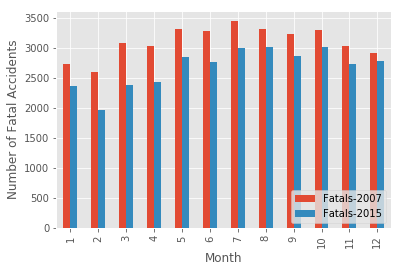

In [64]:
#Figure 2
import pandas as pd 
FARS_2007 = pd.read_csv(FARS2007_FP)
FARS_2015 = pd.read_csv(FARS2015_FP)

fatals2007 = FARS_2007[['FATALS','MONTH']]
fatals2015 = FARS_2015[['FATALS','MONTH']]
count_fatals2007_grouped = fatals2007.groupby('MONTH').agg({'FATALS': 'count'})
count_fatals2015_grouped = fatals2015.groupby('MONTH').agg({'FATALS': 'count'})
all_counts_grouped = pd.concat([count_fatals2007_grouped, count_fatals2015_grouped], axis=1)

colNames = ['Fatals-2007', 'Fatals-2015']
all_counts_grouped.columns = colNames

all_counts_grouped_plot = all_counts_grouped.plot(kind='bar')
all_counts_grouped_plot.set_ylabel('Number of Fatal Accidents')
all_counts_grouped_plot.set_xlabel('Month')
all_counts_grouped_plot.legend(loc='lower right')

#Basic Sum function on all the fatalities for each year.
print("Sum of fatalities in 2007: " + str(fatals2007.FATALS.sum()))
print("Sum of fatalities in 2015: " + str(fatals2015.FATALS.sum()))

#http://pbpython.com/simple-graphing-pandas.html

#### 5. Comparing the collision types
__Figure 3__ shows the percentage of each collision type, the percentage of fatals involved in the collision types, and the percentage of persons involved in each collision type, for each fatal accident in the 2007 and 2015 FARS datasets.

Collision type (MAN_COL) key as per FARS Analytical User's Guide:
- 0 = Not Collision with Motor Vehicle in Transport (Not Necessarily in Transport for 2005-2009)
- 1 = Front-to-Rear
- 2 = Front-to-Front
- 3 (2007) = Angle – Front-to-Side, Same Direction
- 4 (2007) = Angle – Front-to-Side, Opposite Direction
- 5 (2007) = Angle – Front-to-Side, Right Angle (Includes Broadside)
- 6 (2007) = Angle – Front-to-Side/Angle-Direction Not Specified
- 6 (2015) = Angle
- 7 = Sideswipe – Same Direction
- 8 = Sideswipe – Opposite Direction
- 9 = Rear-to-Side
- 10 = Rear-to-Rear
- 11 = Other (End-Swipes and Others)
- 98 (2015) = Not Reported
- 99 = Unknown 

<font color=red>KDD step(s):</font> Data Mining

Text(0.5,0,'Collision Types - 2015')

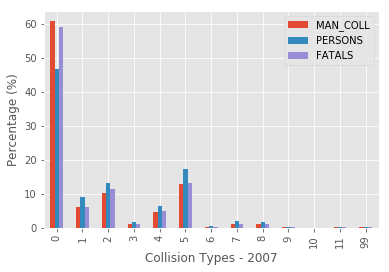

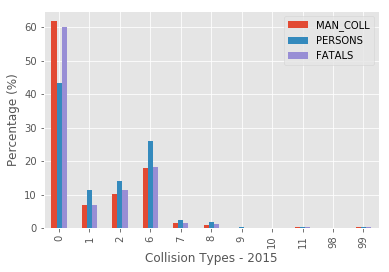

In [55]:
#Figure 3
import pandas as pd
FARS_2007 = pd.read_csv(FARS2007_FP)
FARS_2015 = pd.read_csv(FARS2015_FP)

maner_of_collision_2007 = FARS_2007[['MAN_COLL','FATALS','PERSONS']]
maner_of_collision_2015 = FARS_2015[['MAN_COLL','FATALS','PERSONS']]

#2007
fatals_2007_grouped = maner_of_collision_2007.groupby(['MAN_COLL']).agg({'FATALS': 'sum'})
fatals_2007_total = maner_of_collision_2007['FATALS'].sum()
fatals_2007_percentage = fatals_2007_grouped.div(fatals_2007_total, level='FATALS') * 100

persons_2007_grouped = maner_of_collision_2007.groupby(['MAN_COLL']).agg({'PERSONS': 'sum'})
persons_2007_total = maner_of_collision_2007['PERSONS'].sum()
persons_2007_percentage = persons_2007_grouped.div(persons_2007_total, level='PERSONS') * 100

conditions_2007_grouped = maner_of_collision_2007.groupby(['MAN_COLL']).agg({'MAN_COLL': 'count'})
conditions_2007_total = maner_of_collision_2007['MAN_COLL'].count()
conditions_2007_percentage = conditions_2007_grouped.div(conditions_2007_total, level='MAN_COLL') * 100

#2015
fatals_2015_grouped = maner_of_collision_2015.groupby(['MAN_COLL']).agg({'FATALS': 'sum'})
fatals_2015_total = maner_of_collision_2015['FATALS'].sum()
fatals_2015_percentage = fatals_2015_grouped.div(fatals_2015_total, level='FATALS') * 100

persons_2015_grouped = maner_of_collision_2015.groupby(['MAN_COLL']).agg({'PERSONS': 'sum'})
persons_2015_total = maner_of_collision_2015['PERSONS'].sum()
persons_2015_percentage = persons_2015_grouped.div(persons_2015_total, level='PERSONS') * 100

conditions_2015_grouped = maner_of_collision_2015.groupby(['MAN_COLL']).agg({'MAN_COLL': 'count'})
conditions_2015_total = maner_of_collision_2015['MAN_COLL'].count()
conditions_2015_percentage = conditions_2015_grouped.div(conditions_2015_total, level='MAN_COLL') * 100

#Concatenate Years
all_2007_concat = pd.concat([conditions_2007_percentage, persons_2007_percentage, fatals_2007_percentage], axis=1)
all_2015_concat = pd.concat([conditions_2015_percentage, persons_2015_percentage, fatals_2015_percentage], axis=1)

plot_percentages_by_collision_type_2007 = all_2007_concat.plot(kind='bar')
plot_percentages_by_collision_type_2007.set_ylabel('Percentage (%)')
plot_percentages_by_collision_type_2007.set_xlabel('Collision Types - 2007')

plot_percentages_by_collision_type_2015 = all_2015_concat.plot(kind='bar')
plot_percentages_by_collision_type_2015.set_ylabel('Percentage (%)')
plot_percentages_by_collision_type_2015.set_xlabel('Collision Types - 2015')

#### 6. Comparing the road speed limits
__Figure 4__ shows the percentage of each road speed limit, the percentage of fatals involved in each speed limit, and the percentage of persons involved in each speed limit, for each fatal accident in the 2007 and 2015 FARS datasets.

Road Speed Limits (SP_LIMIT - 2007, VSPD_LIM - 2015) key as per FARS Analytical User's Guide:
- 0 = No Statutory Limit
- 01-98 (2007) = Speed Limit (mph)
- 01-85 (2015) = Speed Limit (mph)
- 98 (2015) = Not Reported
- 99 = Unknown 

<font color=red>KDD step(s):</font> Data Mining

Text(0.5,0,'Speed Limits - 2015')

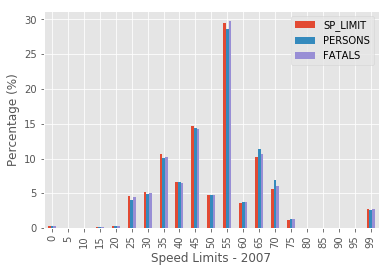

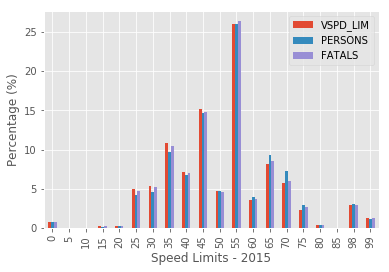

In [46]:
#Figure 4
import pandas as pd
FARS_2007 = pd.read_csv(FARS2007_FP)
FARS_2015 = pd.read_csv(FARS2015_FP)

speed_limit_2007 = FARS_2007[['SP_LIMIT','FATALS','PERSONS']]
speed_limit_2015 = FARS_2015[['VSPD_LIM','FATALS','PERSONS']]

#2007
fatals_2007_grouped = speed_limit_2007.groupby(['SP_LIMIT']).agg({'FATALS': 'sum'})
fatals_2007_total = speed_limit_2007['FATALS'].sum()
fatals_2007_percentage = fatals_2007_grouped.div(fatals_2007_total, level='FATALS') * 100

persons_2007_grouped = speed_limit_2007.groupby(['SP_LIMIT']).agg({'PERSONS': 'sum'})
persons_2007_total = speed_limit_2007['PERSONS'].sum()
persons_2007_percentage = persons_2007_grouped.div(persons_2007_total, level='PERSONS') * 100

conditions_2007_grouped = speed_limit_2007.groupby(['SP_LIMIT']).agg({'SP_LIMIT': 'count'})
conditions_2007_total = speed_limit_2007['SP_LIMIT'].count()
conditions_2007_percentage = conditions_2007_grouped.div(conditions_2007_total, level='SP_LIMIT') * 100

#2015
fatals_2015_grouped = speed_limit_2015.groupby(['VSPD_LIM']).agg({'FATALS': 'sum'})
fatals_2015_total = speed_limit_2015['FATALS'].sum()
fatals_2015_percentage = fatals_2015_grouped.div(fatals_2015_total, level='FATALS') * 100

persons_2015_grouped = speed_limit_2015.groupby(['VSPD_LIM']).agg({'PERSONS': 'sum'})
persons_2015_total = speed_limit_2015['PERSONS'].sum()
persons_2015_percentage = persons_2015_grouped.div(persons_2015_total, level='PERSONS') * 100

conditions_2015_grouped = speed_limit_2015.groupby(['VSPD_LIM']).agg({'VSPD_LIM': 'count'})
conditions_2015_total = speed_limit_2015['VSPD_LIM'].count()
conditions_2015_percentage = conditions_2015_grouped.div(conditions_2015_total, level='VSPD_LIM') * 100

#Concatenate Years
all_2007_concat = pd.concat([conditions_2007_percentage, persons_2007_percentage, fatals_2007_percentage], axis=1)
all_2015_concat = pd.concat([conditions_2015_percentage, persons_2015_percentage, fatals_2015_percentage], axis=1)

plot_percentages_by_speed_limit_2007 = all_2007_concat.plot(kind='bar')
plot_percentages_by_speed_limit_2007.set_ylabel('Percentage (%)')
plot_percentages_by_speed_limit_2007.set_xlabel('Speed Limits - 2007')

plot_percentages_by_speed_limit_2015 = all_2015_concat.plot(kind='bar')
plot_percentages_by_speed_limit_2015.set_ylabel('Percentage (%)')
plot_percentages_by_speed_limit_2015.set_xlabel('Speed Limits - 2015')

#### 7. Comparing the light conditon factors¶
__Figure 5__ shows the percentage of each light conditon, the percentage of fatals involved for each light conditon, and the percentage of persons involved in each light conditon, for each fatal accident in the 2007 and 2015 FARS datasets.

Light Conditon (LGT_COND) key as per FARS Analytical User's Guide:
- 1 = Daylight
- 2 (2007) = Dark
- 2 (2015) = Dark - Not Lighted
- 3 (2007) = Dark but Lighted
- 3 (2015) = Dark – Lighted
- 4 = Dawn
- 5 = Dusk
- 6 (2015) = Dark – Unknown Lighting
- 7 (2015) = Other
- 8 (2015) = Not Reported
- 9 = Unknown

Note: The 2 & 3 keys are identical for both years, just different descriptors.

<font color=red>KDD step(s):</font> Data Mining

Text(0.5,0,'Light Conidtions - 2015')

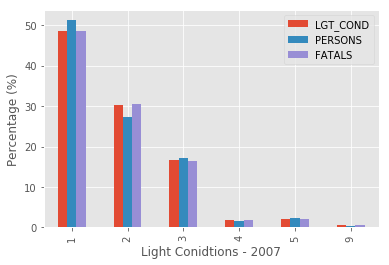

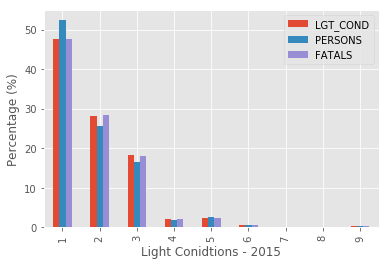

In [47]:
#Figure 5
import pandas as pd
FARS_2007 = pd.read_csv(FARS2007_FP)
FARS_2015 = pd.read_csv(FARS2015_FP)

light_conditions_2007 = FARS_2007[['LGT_COND','FATALS','PERSONS']]
light_conditions_2015 = FARS_2015[['LGT_COND','FATALS','PERSONS']]

#2007
fatals_2007_grouped = light_conditions_2007.groupby(['LGT_COND']).agg({'FATALS': 'sum'})
fatals_2007_total = light_conditions_2007['FATALS'].sum()
fatals_2007_percentage = fatals_2007_grouped.div(fatals_2007_total, level='FATALS') * 100

persons_2007_grouped = light_conditions_2007.groupby(['LGT_COND']).agg({'PERSONS': 'sum'})
persons_2007_total = light_conditions_2007['PERSONS'].sum()
persons_2007_percentage = persons_2007_grouped.div(persons_2007_total, level='PERSONS') * 100

conditions_2007_grouped = light_conditions_2007.groupby(['LGT_COND']).agg({'LGT_COND': 'count'})
conditions_2007_total = light_conditions_2007['LGT_COND'].count()
conditions_2007_percentage = conditions_2007_grouped.div(conditions_2007_total, level='LGT_COND') * 100

#2015
fatals_2015_grouped = light_conditions_2015.groupby(['LGT_COND']).agg({'FATALS': 'sum'})
fatals_2015_total = light_conditions_2015['FATALS'].sum()
fatals_2015_percentage = fatals_2015_grouped.div(fatals_2015_total, level='FATALS') * 100

persons_2015_grouped = light_conditions_2015.groupby(['LGT_COND']).agg({'PERSONS': 'sum'})
persons_2015_total = light_conditions_2015['PERSONS'].sum()
persons_2015_percentage = persons_2015_grouped.div(persons_2015_total, level='PERSONS') * 100

conditions_2015_grouped = light_conditions_2015.groupby(['LGT_COND']).agg({'LGT_COND': 'count'})
conditions_2015_total = light_conditions_2015['LGT_COND'].count()
conditions_2015_percentage = conditions_2015_grouped.div(conditions_2015_total, level='LGT_COND') * 100

#Concatenate Years
all_2007_concat = pd.concat([conditions_2007_percentage, persons_2007_percentage, fatals_2007_percentage], axis=1)
all_2015_concat = pd.concat([conditions_2015_percentage, persons_2015_percentage, fatals_2015_percentage], axis=1)

plot_percentages_by_light_conditions_2007 = all_2007_concat.plot(kind='bar')
plot_percentages_by_light_conditions_2007.set_ylabel('Percentage (%)')
plot_percentages_by_light_conditions_2007.set_xlabel('Light Conidtions - 2007')

plot_percentages_by_light_conditions_2015 = all_2015_concat.plot(kind='bar')
plot_percentages_by_light_conditions_2015.set_ylabel('Percentage (%)')
plot_percentages_by_light_conditions_2015.set_xlabel('Light Conidtions - 2015')

#### 8. Comparing the weather condition factors¶¶
__Figure 6__ shows the percentage of each weather conditon, the percentage of fatals involved for each weather conditon, and the percentage of persons involved in each weather conditon, for each fatal accident in the 2007 and 2015 FARS datasets.

Weather Conditon (LGT_COND) key as per FARS Analytical User's Guide:
- 1 (2007) = Normal
- 1 (2015) = Clear
- 2 (2007) = Rain (Mist)
- 2 (2015) = Rain
- 3 = Sleet, Hail
- 4 (2007) = Snow or Blowing Snow
- 4 (2015) = Snow
- 5 = Fog, Smog, Smoke
- 6 = Severe Crosswinds
- 7 = Blowing Sand, Soil, Dirt
- 8 = Other
- 10 (2015) = Cloudy
- 11 (2015) = Blowing Snow
- 12 (2015) = Freezing Rain or Drizzle
- 9 (2007) = Unknown
- 99 (2015) = Unknown

<font color=red>KDD step(s):</font> Data Mining

Text(0.5,0,'Weather Conidtions - 2015')

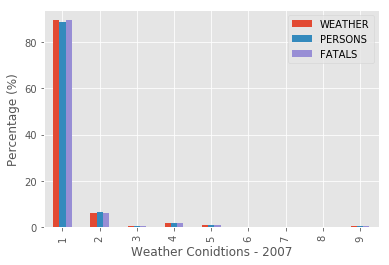

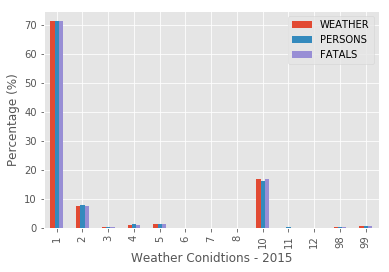

In [48]:
#Figure 6
import pandas as pd
FARS_2007 = pd.read_csv(FARS2007_FP)
FARS_2015 = pd.read_csv(FARS2015_FP)

Weather_2007 = FARS_2007[['WEATHER','FATALS','PERSONS']]
Weather_2015 = FARS_2015[['WEATHER','FATALS','PERSONS']]

#2007
fatals_2007_grouped = Weather_2007.groupby(['WEATHER']).agg({'FATALS': 'sum'})
fatals_2007_total = Weather_2007['FATALS'].sum()
fatals_2007_percentage = fatals_2007_grouped.div(fatals_2007_total, level='FATALS') * 100

persons_2007_grouped = Weather_2007.groupby(['WEATHER']).agg({'PERSONS': 'sum'})
persons_2007_total = Weather_2007['PERSONS'].sum()
persons_2007_percentage = persons_2007_grouped.div(persons_2007_total, level='PERSONS') * 100

conditions_2007_grouped = Weather_2007.groupby(['WEATHER']).agg({'WEATHER': 'count'})
conditions_2007_total = Weather_2007['WEATHER'].count()
conditions_2007_percentage = conditions_2007_grouped.div(conditions_2007_total, level='WEATHER') * 100

#2015
fatals_2015_grouped = Weather_2015.groupby(['WEATHER']).agg({'FATALS': 'sum'})
fatals_2015_total = Weather_2015['FATALS'].sum()
fatals_2015_percentage = fatals_2015_grouped.div(fatals_2015_total, level='FATALS') * 100

persons_2015_grouped = Weather_2015.groupby(['WEATHER']).agg({'PERSONS': 'sum'})
persons_2015_total = Weather_2015['PERSONS'].sum()
persons_2015_percentage = persons_2015_grouped.div(persons_2015_total, level='PERSONS') * 100

conditions_2015_grouped = Weather_2015.groupby(['WEATHER']).agg({'WEATHER': 'count'})
conditions_2015_total = Weather_2015['WEATHER'].count()
conditions_2015_percentage = conditions_2015_grouped.div(conditions_2015_total, level='WEATHER') * 100

#Concatenate Years
all_2007_concat = pd.concat([conditions_2007_percentage, persons_2007_percentage, fatals_2007_percentage], axis=1)
all_2015_concat = pd.concat([conditions_2015_percentage, persons_2015_percentage, fatals_2015_percentage], axis=1)

plot_percentages_by_weather_conditions_2007 = all_2007_concat.plot(kind='bar')
plot_percentages_by_weather_conditions_2007.set_ylabel('Percentage (%)')
plot_percentages_by_weather_conditions_2007.set_xlabel('Weather Conidtions - 2007')

plot_percentages_by_weather_conditions_2015 = all_2015_concat.plot(kind='bar')
plot_percentages_by_weather_conditions_2015.set_ylabel('Percentage (%)')
plot_percentages_by_weather_conditions_2015.set_xlabel('Weather Conidtions - 2015')

#### 9. Comparing the Road Surface conditon factors¶
__Figure 7__ shows the percentage of each road surface condition, the percentage of fatals involved for each surface conditon, and the percentage of persons involved in each surface conditon, for each fatal accident in the 2007 and 2015 FARS datasets.

Surface Conditon (SUR_COND - 2007, VSURCOND - 2015) key as per FARS Analytical User's Guide:
- 0 (2015) = Nontrafficway area
- 1 = Dry
- 2 = Wet
- 3 (2007) = Snow or Slush
- 3 (2015) = Snow
- 4 = Ice/Frost
- 5 (2007) = Sand, Dirt, Mud, Gravel
- 5 (2015) = Sand
- 6 = Water (Standing or Moving)
- 7 = Oil
- 8 = Other
- 9 (2007) = Unknown
- 10 (2015) = Slush
- 11 (2015) = Mud, dirt, gravel
- 98 (2015) = Unreported
- 99 (2015) = Unknown

<font color=red>KDD step(s):</font> Data Mining

Text(0.5,0,'Road Surface Conidtions - 2015')

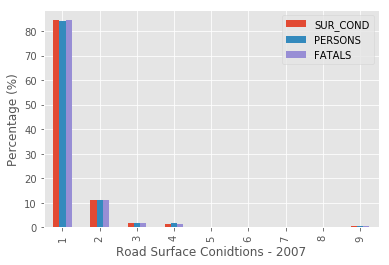

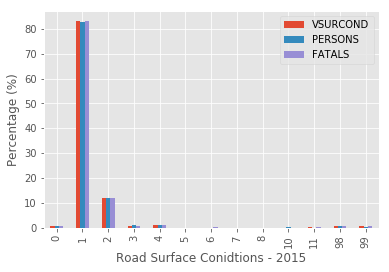

In [49]:
#Figure 7
import pandas as pd
FARS_2007 = pd.read_csv(FARS2007_FP)
FARS_2015 = pd.read_csv(FARS2015_FP)

Road_Surface_2007 = FARS_2007[['SUR_COND','FATALS','PERSONS']]
Road_Surface_2015 = FARS_2015[['VSURCOND','FATALS','PERSONS']]

#2007
fatals_2007_grouped = Road_Surface_2007.groupby(['SUR_COND']).agg({'FATALS': 'sum'})
fatals_2007_total = Road_Surface_2007['FATALS'].sum()
fatals_2007_percentage = fatals_2007_grouped.div(fatals_2007_total, level='FATALS') * 100

persons_2007_grouped = Road_Surface_2007.groupby(['SUR_COND']).agg({'PERSONS': 'sum'})
persons_2007_total = Road_Surface_2007['PERSONS'].sum()
persons_2007_percentage = persons_2007_grouped.div(persons_2007_total, level='PERSONS') * 100

conditions_2007_grouped = Road_Surface_2007.groupby(['SUR_COND']).agg({'SUR_COND': 'count'})
conditions_2007_total = Road_Surface_2007['SUR_COND'].count()
conditions_2007_percentage = conditions_2007_grouped.div(conditions_2007_total, level='SUR_COND') * 100

#2015
fatals_2015_grouped = Road_Surface_2015.groupby(['VSURCOND']).agg({'FATALS': 'sum'})
fatals_2015_total = Road_Surface_2015['FATALS'].sum()
fatals_2015_percentage = fatals_2015_grouped.div(fatals_2015_total, level='FATALS') * 100

persons_2015_grouped = Road_Surface_2015.groupby(['VSURCOND']).agg({'PERSONS': 'sum'})
persons_2015_total = Road_Surface_2015['PERSONS'].sum()
persons_2015_percentage = persons_2015_grouped.div(persons_2015_total, level='PERSONS') * 100

conditions_2015_grouped = Road_Surface_2015.groupby(['VSURCOND']).agg({'VSURCOND': 'count'})
conditions_2015_total = Road_Surface_2015['VSURCOND'].count()
conditions_2015_percentage = conditions_2015_grouped.div(conditions_2015_total, level='VSURCOND') * 100

#Concatenate Years
all_2007_concat = pd.concat([conditions_2007_percentage, persons_2007_percentage, fatals_2007_percentage], axis=1)
all_2015_concat = pd.concat([conditions_2015_percentage, persons_2015_percentage, fatals_2015_percentage], axis=1)

plot_percentages_by_road_surface_conditions_2007 = all_2007_concat.plot(kind='bar')
plot_percentages_by_road_surface_conditions_2007.set_ylabel('Percentage (%)')
plot_percentages_by_road_surface_conditions_2007.set_xlabel('Road Surface Conidtions - 2007')

plot_percentages_by_road_surface_conditions_2015 = all_2015_concat.plot(kind='bar')
plot_percentages_by_road_surface_conditions_2015.set_ylabel('Percentage (%)')
plot_percentages_by_road_surface_conditions_2015.set_xlabel('Road Surface Conidtions - 2015')

#### 10. Fatals per state - 2007
__Figure 8__ shows the population (in 100,000), persons involved per-million in each state, and fatalities per-million in each state for 2007. Each state has been organised into a region. This involved including the 2007 Census estimation dataset.

Region (REGION) key as per U.S. Census Bureau:
- 1 = North East
- 2 = Midwest
- 3 = South
- 4 = West 

<font color=red>KDD step(s):</font> Data Mining

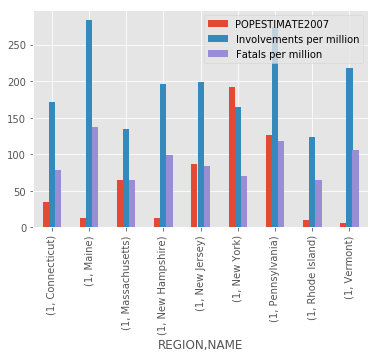

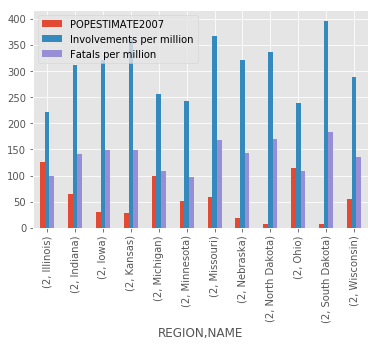

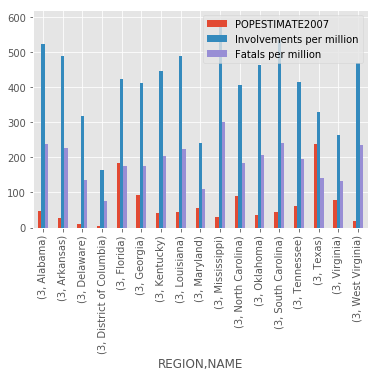

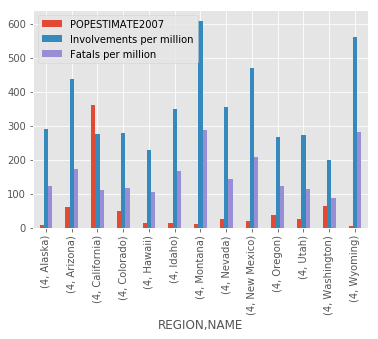

In [50]:
#Figure 8 (2007)
import pandas as pd
population = pd.read_csv(POP2007_FP)
accidents = pd.read_csv(FARS2007_FP)

fatals_persons = accidents[['STATE','FATALS','PERSONS']]
pop = population[['STATE','REGION','NAME','POPESTIMATE2007','AGE','SEX']]
pop = pop[pop.STATE != 0] #Exclude total for entire United States
pop = pop[pop.AGE == 999] #Only the total for all ages
pop = pop[pop.SEX == 0] #Only the total for all genders

mergedDF = pd.merge(fatals_persons,pop,on='STATE')
fatals_grouped = mergedDF.groupby(['REGION','NAME']).agg({'FATALS': 'sum'})
persons_grouped = mergedDF.groupby(['REGION','NAME']).agg({'PERSONS': 'sum'})

region_pops = pop.groupby(['REGION','NAME']).agg({'POPESTIMATE2007': 'sum'})
region_pops_per_hundred_thou = region_pops / 100000

fatals_pop = pd.concat([fatals_grouped,region_pops], axis=1)
fatals_per_mill = (fatals_pop['FATALS'] / fatals_pop['POPESTIMATE2007']) * 1000000

persons_pop = pd.concat([persons_grouped,region_pops], axis=1)
persons_per_mill = (persons_pop['PERSONS'] / persons_pop['POPESTIMATE2007']) * 1000000

persons_fatals_regions = pd.concat([region_pops_per_hundred_thou,persons_per_mill.rename('Involvements per million'),fatals_per_mill.rename('Fatals per million')],axis=1)
plt = persons_fatals_regions.groupby(['REGION']).plot.bar()

#### 11. Fatals per state - 2015
__Figure 9__ shows the population (in 100,000), persons involved per-million in each state, and fatalities per-million in each state for 2015. Each state has been organised into a region. This involved including the 2015 Census estimation dataset.

Region (REGION) key as per U.S. Census Bureau:
- 1 = North East
- 2 = Midwest
- 3 = South
- 4 = West

<font color=red>KDD step(s):</font> Data Mining

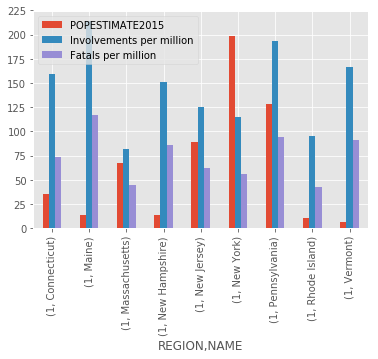

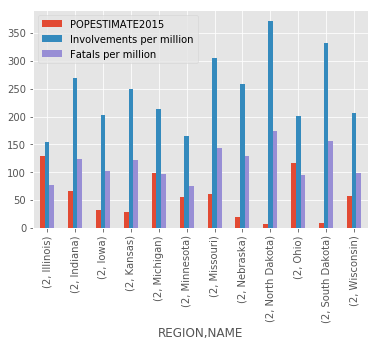

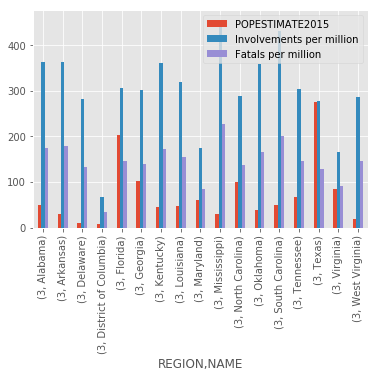

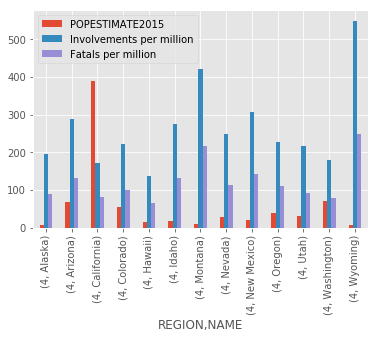

In [51]:
#Figure 9 (2015)
import pandas as pd
population = pd.read_csv(POP2015_FP)
accidents = pd.read_csv(FARS2015_FP)

fatals_persons = accidents[['STATE','FATALS','PERSONS']]
pop = population[['STATE','REGION','NAME','POPESTIMATE2015']]#,'AGE','SEX']]
pop = pop[pop.STATE != [0]]#Only show states - no regions or Uinited States
pop = pop[pop.STATE != [72]]#No Puerto Rico

mergedDF = pd.merge(fatals_persons,pop,on='STATE')
fatals_grouped = mergedDF.groupby(['REGION','NAME']).agg({'FATALS': 'sum'})
persons_grouped = mergedDF.groupby(['REGION','NAME']).agg({'PERSONS': 'sum'})

region_pops = pop.groupby(['REGION','NAME']).agg({'POPESTIMATE2015': 'sum'})
region_pops_per_hundred_thou = region_pops / 100000

fatals_pop = pd.concat([fatals_grouped,region_pops], axis=1)
fatals_per_mill = (fatals_pop['FATALS'] / fatals_pop['POPESTIMATE2015']) * 1000000

persons_pop = pd.concat([persons_grouped,region_pops], axis=1)
persons_per_mill = (persons_pop['PERSONS'] / persons_pop['POPESTIMATE2015']) * 1000000

persons_fatals_regions = pd.concat([region_pops_per_hundred_thou,persons_per_mill.rename('Involvements per million'),fatals_per_mill.rename('Fatals per million')],axis=1)
plt = persons_fatals_regions.groupby(['REGION']).plot.bar()

#### 12. Fatals per Region - 2007
__Figure 10__ shows the population (in 100,000), persons involved per-million in each region, and fatalities per-million in each region for 2007. This involved including the 2007 Census estimation dataset.

Region (REGION) key as per U.S. Census Bureau:
- 1 = North East
- 2 = Midwest
- 3 = South
- 4 = West

<font color=red>KDD step(s):</font> Data Mining

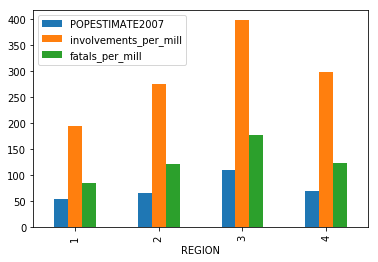

In [199]:
#Figure 10 (2007)
import pandas as pd
population = pd.read_csv(POP2007_FP)
accidents = pd.read_csv(POP2015_FP)

#population per 100,000 and fatals & persons involved per million by region
fatals_persons = accidents[['STATE','FATALS','PERSONS']]
pop = population[['STATE','REGION','NAME','POPESTIMATE2007','AGE','SEX']]
pop = pop[pop.STATE != 0] #Exclude total for entire United States
pop = pop[pop.AGE == 999] #Only the total for all ages
pop = pop[pop.SEX == 0] #Only the total for all genders

mergedDF = pd.merge(fatals_persons,pop,on='STATE')
fatals_grouped = mergedDF.groupby(['REGION']).agg({'FATALS': 'sum'})
persons_grouped = mergedDF.groupby(['REGION']).agg({'PERSONS': 'sum'})

region_pops = pop.groupby(['REGION']).agg({'POPESTIMATE2007': 'sum'})
region_pops_per_hundred_thou = region_pops / 1000000
fatals_pop = pd.concat([fatals_grouped,region_pops], axis=1)
fatals_per_mill = (fatals_pop['FATALS'] / fatals_pop['POPESTIMATE2007']) * 1000000
persons_pop = pd.concat([persons_grouped,region_pops], axis=1)
persons_per_mill = (persons_pop['PERSONS'] / persons_pop['POPESTIMATE2007']) * 1000000

persons_fatals_regions = pd.concat([region_pops_per_hundred_thou,persons_per_mill.rename('involvements_per_mill'),fatals_per_mill.rename('fatals_per_mill')],axis=1)
plt = persons_fatals_regions.plot.bar()

#### 13. Fatals per Region - 2015
__Figure 11__ shows the population (in 100,000), persons involved per-million in each region, and fatalities per-million in each region for 2015. This involved including the 2015 Census estimation dataset.

Region (REGION) key as per U.S. Census Bureau:
- 1 = North East
- 2 = Midwest
- 3 = South
- 4 = West

<font color=red>KDD step(s):</font> Data Mining

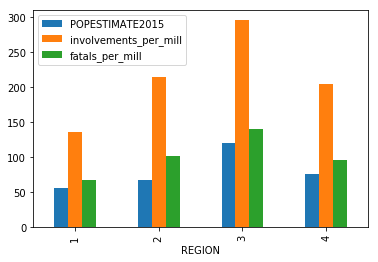

In [197]:
#Figure 11 (2015)
import pandas as pd
population = pd.read_csv(POP2015_FP)
accidents = pd.read_csv(FARS2015_FP)

#population per 100,000 and fatals & persons involved per million by region
fatals_persons = accidents[['STATE','FATALS','PERSONS']]
pop = population[['STATE','SUMLEV','REGION','POPESTIMATE2015']]#,'AGE','SEX']]
pop = pop[pop.STATE != 0] #Only show states
pop = pop[pop.STATE != 72] #Only show states (Not Puerto Rico)

mergedDF = pd.merge(fatals_persons,pop,on='STATE')
fatals_grouped = mergedDF.groupby(['REGION']).agg({'FATALS': 'sum'})
persons_grouped = mergedDF.groupby(['REGION']).agg({'PERSONS': 'sum'})

region_pops = pop.groupby(['REGION']).agg({'POPESTIMATE2015': 'sum'})
region_pops_per_hundred_thou = region_pops / 1000000
fatals_pop = pd.concat([fatals_grouped,region_pops], axis=1)
fatals_per_mill = (fatals_pop['FATALS'] / fatals_pop['POPESTIMATE2015']) * 1000000
persons_pop = pd.concat([persons_grouped,region_pops], axis=1)
persons_per_mill = (persons_pop['PERSONS'] / persons_pop['POPESTIMATE2015']) * 1000000

persons_fatals_regions = pd.concat([region_pops_per_hundred_thou,persons_per_mill.rename('involvements_per_mill'),fatals_per_mill.rename('fatals_per_mill')],axis=1)
plt = persons_fatals_regions.plot.bar()

#### 14. Correlation between EMS arrival time and fatal rate
__Figure 12__ shows the correlation between the EMS arrival time and fatal rate for accidents in 2007 and 2015.

Note: This is not accurate, as no matter when the EMSs arrive, the dataset only contains records of fatalities. A better correlation analysis would be to compare the time of death with the time of EMS arrival.

<font color=red>KDD step(s):</font> Data Mining

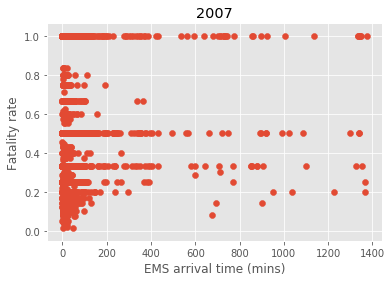

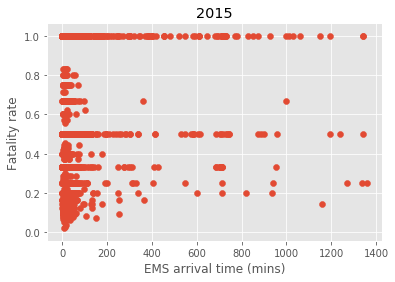

,rate_numerical,arrival_time
count,14303.000000,14303.000000
mean,0.658997,20.669160
std,0.316246,67.776427
min,0.020833,0.000000
25%,0.333333,6.000000
50%,0.500000,10.000000
75%,1.000000,18.000000
max,1.000000,1358.000000


In [65]:
#Figure 12
import numpy as np
FARS2007 = pd.read_csv(FARS2007_FP)
FARS2015 = pd.read_csv(FARS2015_FP)

#2007
time_fatals = FARS2007[['rate_numerical','arrival_time']]
time_fatals = time_fatals.dropna(subset = ['rate_numerical', 'arrival_time'])
#np.corrcoef(accidents.rate_numerical, accidents.arrival_time)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(time_fatals.arrival_time, time_fatals.rate_numerical)
plt.title("2007")
plt.xlabel("EMS arrival time (mins)")
plt.ylabel("Fatality rate")
plt.show()

#2015
time_fatals = FARS2015[['rate_numerical','arrival_time']]
time_fatals = time_fatals.dropna(subset = ['rate_numerical', 'arrival_time'])
time_fatals = time_fatals[time_fatals.rate_numerical <= 1.0] #exclude rows where the rate is greater than 1.0 i.e. the number of FATALS is greater than the number of PERSONS involved
#np.corrcoef(accidents.rate_numerical, accidents.arrival_time)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(time_fatals.arrival_time, time_fatals.rate_numerical)
plt.title("2015")
plt.xlabel("EMS arrival time (mins)")
plt.ylabel("Fatality rate")
plt.show()

time_fatals.describe()

#### 15. Clustering 2007

__Figure 13__ shows the clusters of States in 2007 with low and high fatality rates rlative to their estimated population and fatality rate.

<font color=red>KDD step(s):</font> Preprocessing & Data Mining

               FATALS  POPESTIMATE2007  rate_low  rate_high
clusters                                                   
0          604.724138        43.845569         1          0
1          392.000000        27.378412         0          1
2         3668.500000       300.411470         1          0
3         1584.142857       112.006897         0          1


Text(28.3076,0.5,'FATALS')

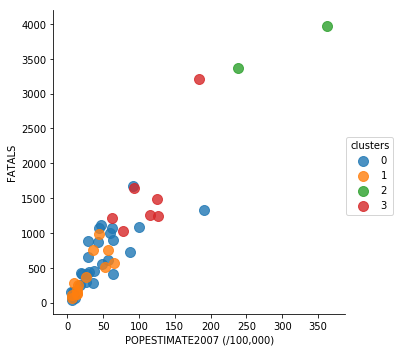

In [9]:
# Figure 13 (2007)
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

population = pd.read_csv(POP2007_FP)
accidents = pd.read_csv(FARS2007_FP)

fatals = accidents[['STATE','FATALS','rate']]
pop = population[['STATE','POPESTIMATE2007','AGE','SEX']]
pop = pop[pop.STATE != 0] #Exclude total for entire United States
pop = pop[pop.AGE == 999] #Only the total for all ages
pop = pop[pop.SEX == 0] #Only the total for all genders

total_fatals = fatals.groupby(['STATE']).agg({'FATALS': 'sum'})
count_fatals = fatals.groupby(['STATE']).agg({'FATALS': 'count'})
state_pops = pop.groupby(['STATE']).agg({'POPESTIMATE2007': 'sum'})
state_pops_per_hundred_thou = state_pops / 100000
total_fatals['rate'] = accidents[['rate']]

fatals_pops_join = state_pops_per_hundred_thou.join(total_fatals, how='outer')

#Make a copy of fatals_pops_join
df_tr = fatals_pops_join

#Transform the rate to dummies
df_tr = pd.get_dummies(df_tr, columns=['rate'])

#Standardize
clmns = ['FATALS','POPESTIMATE2007','rate_low','rate_high']
df_tr_std = stats.zscore(df_tr[clmns])

import numpy as np
from sklearn.cluster import KMeans

#Cluster
kmeans = KMeans(n_clusters=4).fit(df_tr_std)
labels = kmeans.labels_

centroids = kmeans.cluster_centers_

#Add to originaal data
df_tr['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

#analyze the clusters
print (df_tr[clmns].groupby(['clusters']).mean())

#Scatter plot of FATALS and POPESTIMATE2007
sns.lmplot('POPESTIMATE2007', 'FATALS', 
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.xlabel('POPESTIMATE2007 (/100,000)')
plt.ylabel('FATALS')
#https://datascience.stackexchange.com/questions/16700/confused-about-how-to-apply-kmeans-on-my-a-dataset-with-features-extracted

#### 16. Clustering 2015

__Figure 14__ shows the clusters of States in 2015 with low and high fatality rates rlative to their estimated population and fatality rate.

<font color=red>KDD step(s):</font> Preprocessing & Data Mining

               FATALS  POPESTIMATE2015  rate_low  rate_high
clusters                                                   
0          477.545455        39.658929         0          1
1          411.047619        39.322145         1          0
2         3323.500000       332.436620         1          0
3         1521.666667       141.210612         0          1


Text(28.3076,0.5,'FATALS')

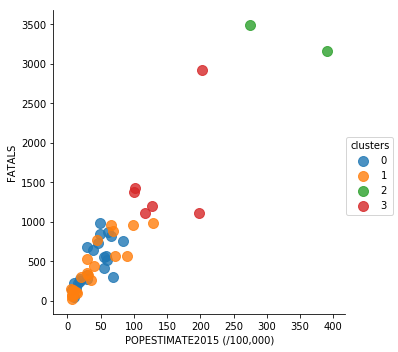

In [8]:
#Figure 14 (2015)
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

population = pd.read_csv(POP2015_FP)
accidents = pd.read_csv(FARS2015_FP)

fatals = accidents[['STATE','FATALS','rate','rate_numerical']]
#fatals = fatals.dropna(subset = ['STATE','FATALS','rate_numerical','rate'])
pop = population[['STATE','POPESTIMATE2015']]
pop = pop[pop.STATE != 0] #Exclude total for entire United States
pop = pop[pop.STATE != 72] #Exclude Puerto Rico
fatals = fatals[fatals.rate_numerical <= 1.0]

total_fatals = fatals.groupby(['STATE']).agg({'FATALS': 'sum'})
count_fatals = fatals.groupby(['STATE']).agg({'FATALS': 'count'})
state_pops = pop.groupby(['STATE']).agg({'POPESTIMATE2015': 'sum'})
state_pops_per_hundred_thou = state_pops / 100000
total_fatals['rate'] = accidents[['rate']]

fatals_pops_join = state_pops_per_hundred_thou.join(total_fatals, how='outer')

#Make a copy of fatals_pops_join
df_tr = fatals_pops_join

#Transform the rate to dummies
df_tr = pd.get_dummies(df_tr, columns=['rate'])

#Standardize
clmns = ['FATALS','POPESTIMATE2015','rate_low','rate_high']
df_tr_std = stats.zscore(df_tr[clmns])

df_tr

import numpy as np
from sklearn.cluster import KMeans

#Cluster
kmeans = KMeans(n_clusters=4).fit(df_tr_std)
labels = kmeans.labels_

#Add to originaal data
df_tr['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

#analyze the clusters
print (df_tr[clmns].groupby(['clusters']).mean())

#Scatter plot of FATALS and POPESTIMATE2007
sns.lmplot('POPESTIMATE2015', 'FATALS', 
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.xlabel('POPESTIMATE2015 (/100,000)')
plt.ylabel('FATALS')

#https://datascience.stackexchange.com/questions/16700/confused-about-how-to-apply-kmeans-on-my-a-dataset-with-features-extracted

#### 17. Output .arff file for Apriori in Weka
Weka was used for applying the Apriori algorithm for association rule mining on the 2007 FARS data set.

Table 1 (a) shows the "cleaned" 2007 data that was output to a .arff file for use in Weka.
Table 2 (a) shows the thirteen association rules generated for the 2007 data using the Apriori algorithm in Weka.

Note: In Weka, all the attributes must be converted to __Nominal__ data.

<font color=red>KDD step(s):</font> Data Preprocessing, Transformation, & Mining 

In [20]:
#Figure 4 in paper (2007) - Apriori in Weka
import numpy as np
accidents = pd.read_csv(FARS2007_FP)
association_fatals = accidents[['LGT_COND','WEATHER','SUR_COND','MAN_COLL','SP_LIMIT','rate']]

#Data Prep
association_fatals_dropped = association_fatals[association_fatals.LGT_COND != 9]
association_fatals_dropped = association_fatals_dropped[association_fatals_dropped.WEATHER != 9]
association_fatals_dropped = association_fatals_dropped[association_fatals_dropped.SUR_COND != 9]
association_fatals_dropped = association_fatals_dropped[association_fatals_dropped.MAN_COLL != 99]
association_fatals_dropped = association_fatals_dropped[association_fatals_dropped.MAN_COLL != 99]
association_fatals_dropped = association_fatals_dropped[association_fatals_dropped.SP_LIMIT != 99]

#https://stackoverflow.com/questions/39928264/how-to-convert-all-columns-from-numeric-to-categorical-using-python
# get column names of data frame in a list
col_names = list(association_fatals_dropped)
# loop to change each column to category type
for col in col_names:
    association_fatals_dropped[col] = association_fatals_dropped[col].astype('category',copy=False)

association_fatals_dropped.to_csv("association_fatals_dropped2007.arff", index = False)
print("2007 File created for Weka")

#https://www.youtube.com/watch?v=YxqIdh5Lzq0 -> Weka Apriori tutorial

2007 File created for Weka


#### 18. Output .arff file for Apriori in Weka
Weka was used for applying the Apriori algorithm for association rule mining on the 2015 FARS data set.

Table 1 (b) shows the "cleaned" 2015 data that was output to a .arff file for use in Weka.
Table 2 (b) shows the thirteen association rules generated for the 2015 data using the Apriori algorithm in Weka.

Note: In Weka, all the attributes must be converted to __Nominal__ data.

<font color=red>KDD step(s):</font> Data Preprocessing, Transformation, & Mining 

In [21]:
#Figure 5 in paper (2015) - Apriori in Weka
import numpy as np
accidents = pd.read_csv(FARS2015_FP)
association_fatals = accidents[['LGT_COND','WEATHER','VSURCOND','MAN_COLL','VSPD_LIM','rate']]

#Data Prep
association_fatals_dropped = association_fatals[association_fatals.LGT_COND != 9]
association_fatals_dropped = association_fatals_dropped[association_fatals_dropped.WEATHER != 9]
association_fatals_dropped = association_fatals_dropped[association_fatals_dropped.VSURCOND != 9]
association_fatals_dropped = association_fatals_dropped[association_fatals_dropped.MAN_COLL != 99]
association_fatals_dropped = association_fatals_dropped[association_fatals_dropped.VSPD_LIM != 99]
association_fatals_dropped = association_fatals_dropped[association_fatals_dropped.VSPD_LIM != 98]

#https://stackoverflow.com/questions/39928264/how-to-convert-all-columns-from-numeric-to-categorical-using-python
# get column names of data frame in a list
col_names = list(association_fatals_dropped)
# loop to change each column to category type
for col in col_names:
    association_fatals_dropped[col] = association_fatals_dropped[col].astype('category',copy=False)

association_fatals_dropped.to_csv("association_fatals_dropped2015.arff", index = False)
print("2015 File created for Weka")

#association_fatals_dropped

#https://www.youtube.com/watch?v=YxqIdh5Lzq0 -> Weka Apriori tutorial

2015 File created for Weka
